In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
import os
import pandas as pd
import scipy.stats as stats
import gmaps
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
filename = 'Resources/Education_Infant_Death_Records_2007_2016.csv'
filename_df = pd.read_csv(filename, encoding="ISO-8859-1")
filename_df

,Notes,Education,Education Code,Deaths,Births,Death Rate
0,NaN,8th grade or less,1,8365,1353617,6.18
1,NaN,9th through 12th grade with no diploma,2,32649,4001653,8.16
2,NaN,High school graduate or GED completed,3,55470,7780077,7.13
3,NaN,"Some college credit, but not a degree",4,38056,6330420,6.01
4,NaN,"Associate degree (AA, AS)",5,11288,2316041,4.87
5,NaN,"Bachelor's degree (BA, AB, BS)",6,20643,5534565,3.73
6,NaN,"Master's degree (MA, MS)",7,7933,2366958,3.35
7,NaN,"Doctorate (PHD, EdD) or Professional Degree (M...",8,2105,674553,3.12
8,NaN,Unknown/Not on certificate,Unk,9045,492371,18.37
9,NaN,Excluded,999,63580,9594815,6.63


In [3]:
education_sorted =filename_df.sort_values(["Death Rate"],ascending=False)
education_sorted

,Notes,Education,Education Code,Deaths,Births,Death Rate
8,NaN,Unknown/Not on certificate,Unk,9045,492371,18.37
1,NaN,9th through 12th grade with no diploma,2,32649,4001653,8.16
2,NaN,High school graduate or GED completed,3,55470,7780077,7.13
9,NaN,Excluded,999,63580,9594815,6.63
0,NaN,8th grade or less,1,8365,1353617,6.18
3,NaN,"Some college credit, but not a degree",4,38056,6330420,6.01
4,NaN,"Associate degree (AA, AS)",5,11288,2316041,4.87
5,NaN,"Bachelor's degree (BA, AB, BS)",6,20643,5534565,3.73
6,NaN,"Master's degree (MA, MS)",7,7933,2366958,3.35
7,NaN,"Doctorate (PHD, EdD) or Professional Degree (M...",8,2105,674553,3.12


In [4]:
del education_sorted['Deaths']
del education_sorted['Education Code']
del education_sorted['Births']
del education_sorted['Notes']
education_sorted.head()

,Education,Death Rate
8,Unknown/Not on certificate,18.37
1,9th through 12th grade with no diploma,8.16
2,High school graduate or GED completed,7.13
9,Excluded,6.63
0,8th grade or less,6.18


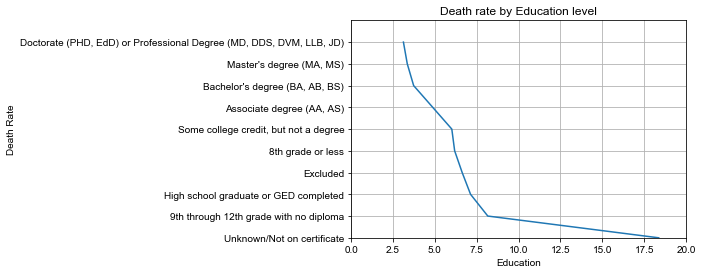

In [5]:
plt.plot(education_sorted["Death Rate"], 
            education_sorted["Education"])

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Death rate by Education level")
plt.ylabel("Death Rate")
plt.xlabel("Education")
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(0, 10)
# Save the figure
plt.savefig("Resources/Education.png")

# Show plot
plt.show()

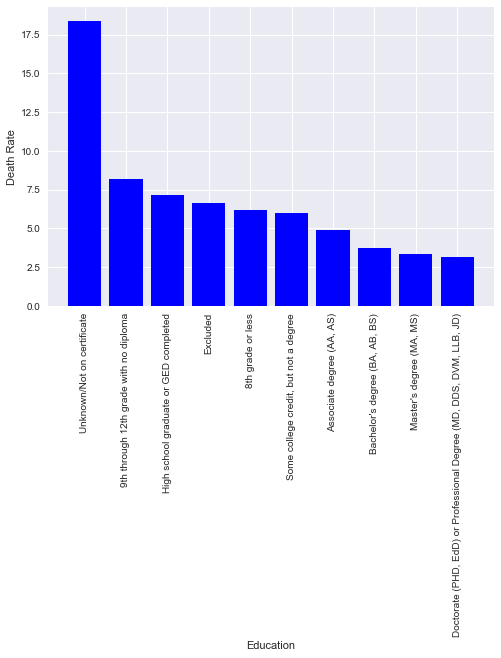

In [6]:
x_axis = education_sorted['Education']
y_axis = education_sorted['Death Rate']
plt.tight_layout()
plt.ylabel("Death Rate")
plt.xlabel("Education")
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(education_sorted['Education'], rotation="vertical")

plt.savefig("Resources/rated_by_Education.png")
plt.show()

In [7]:
countyfilename = 'Resources/County_Infant_Death_Records_2007_2016.csv'
countyfilename_df = pd.read_csv(countyfilename, encoding="ISO-8859-1")
countyfilename_df.head()

,County,Education,Death Rate
0,"Jefferson County, AL",9th through 12th grade with no diploma,13.14
1,"Jefferson County, AL",High school graduate or GED completed,10.32
2,"Jefferson County, AL","Some college credit, but not a degree",12.27
3,"Jefferson County, AL","Associate degree (AA, AS)",9.90
4,"Jefferson County, AL","Bachelor's degree (BA, AB, BS)",7.18


In [8]:
#county_sorted.loc[county_sorted['Education']!= "Unknown/Not on certificate"]

In [9]:
county_sorted =countyfilename_df.sort_values(["Death Rate"],ascending=False)
exclude_unknown = county_sorted.loc[county_sorted['Education']!= "Unknown/Not on certificate"]
exclude_unknown.head()

,County,Education,Death Rate
7,"Madison County, AL",9th through 12th grade with no diploma,18.97
1427,"Mahoning County, OH",9th through 12th grade with no diploma,16.73
780,"East Baton Rouge Parish, LA",9th through 12th grade with no diploma,16.11
774,"Caddo Parish, LA",9th through 12th grade with no diploma,16.06
24,"Anchorage Borough, AK",9th through 12th grade with no diploma,15.94


In [10]:
usdafilename = 'Resources/Education_USDA.csv'
usdafilename_df = pd.read_csv(usdafilename, encoding="ISO-8859-1")
usdafilename_df

,FIPS Code,State,Area name,"Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",Unnamed: 11
0,1001.0,AL,Autauga County,"4,521","12,363","10,697","9,176",12.3,33.6,29.1,25.0,NaN
1,1003.0,AL,Baldwin County,"13,997","39,771","45,286","43,968",9.8,27.8,31.7,30.7,NaN
2,1005.0,AL,Barbour County,"4,960","6,549","4,707","2,218",26.9,35.5,25.5,12.0,NaN
3,1007.0,AL,Bibb County,"2,833","6,958","3,971","2,097",17.9,43.9,25.0,13.2,NaN
4,1009.0,AL,Blount County,"7,980","12,740","13,583","5,172",20.2,32.3,34.4,13.1,NaN
5,1011.0,AL,Bullock County,"2,113","2,699","1,575",990,28.6,36.6,21.4,13.4,NaN
6,1013.0,AL,Butler County,"2,645","5,637","3,423","2,253",18.9,40.4,24.5,16.1,NaN
7,1015.0,AL,Calhoun County,"13,254","25,440","26,168","14,113",16.8,32.2,33.1,17.9,NaN
8,1017.0,AL,Chambers County,"4,537","9,109","6,894","3,158",19.1,38.4,29.1,13.3,NaN
9,1019.0,AL,Cherokee County,"3,850","7,179","5,424","2,344",20.5,38.2,28.9,12.5,NaN


In [11]:
del usdafilename_df['Less than a high school diploma, 2013-17']
del usdafilename_df['High school diploma only, 2013-17']
del usdafilename_df["Some college or associate's degree, 2013-17"]
del usdafilename_df["Bachelor's degree or higher, 2013-17"]
del usdafilename_df["Unnamed: 11"]
        

In [12]:
usdafilename_df = usdafilename_df.dropna()
         

In [13]:
renamed_code = usdafilename_df.rename(columns={"FIPS Code":"GEOID"})
renamed_code['GEOID'] = renamed_code['GEOID'].map(lambda x: int(x))
renamed_code.head()

,GEOID,State,Area name,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,1001,AL,Autauga County,12.3,33.6,29.1,25.0
1,1003,AL,Baldwin County,9.8,27.8,31.7,30.7
2,1005,AL,Barbour County,26.9,35.5,25.5,12.0
3,1007,AL,Bibb County,17.9,43.9,25.0,13.2
4,1009,AL,Blount County,20.2,32.3,34.4,13.1


In [14]:
gazfilename = 'Resources/2017_Gaz_counties_national.csv'
gazfilename_df = pd.read_csv(gazfilename, encoding="ISO-8859-1")
gazfilename_df

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1.539615e+09,25744269,594.449,9.940,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4.117606e+09,1133109409,1589.817,437.496,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2.292145e+09,50538698,885.002,19.513,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1.612166e+09,9603798,622.461,3.708,33.015893,-87.127148
4,AL,1009,161530,Blount County,1.670079e+09,15039864,644.821,5.807,33.977358,-86.566440
5,AL,1011,161531,Bullock County,1.613059e+09,6054988,622.806,2.338,32.101759,-85.717261
6,AL,1013,161532,Butler County,2.011985e+09,2718248,776.832,1.050,31.751667,-86.681969
7,AL,1015,161533,Calhoun County,1.569244e+09,16573120,605.889,6.399,33.771706,-85.822513
8,AL,1017,161534,Chambers County,1.545009e+09,17048126,596.531,6.582,32.915504,-85.394032
9,AL,1019,161535,Cherokee County,1.434229e+09,119702920,553.759,46.218,34.069515,-85.654242


In [15]:
del gazfilename_df['USPS']
del gazfilename_df['ANSICODE']
del gazfilename_df["NAME"]
del gazfilename_df["ALAND"]
del gazfilename_df['AWATER']
del gazfilename_df['ALAND_SQMI']
del gazfilename_df["AWATER_SQMI"]
gazfilename_df.head()


,GEOID,INTPTLAT,INTPTLONG
0,1001,32.532237,-86.646440
1,1003,30.659218,-87.746067
2,1005,31.870253,-85.405104
3,1007,33.015893,-87.127148
4,1009,33.977358,-86.566440


In [16]:
merge_table = pd.merge(renamed_code, gazfilename_df, on="GEOID")
merge_table 

,GEOID,State,Area name,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",INTPTLAT,INTPTLONG
0,1001,AL,Autauga County,12.3,33.6,29.1,25.0,32.532237,-86.646440
1,1003,AL,Baldwin County,9.8,27.8,31.7,30.7,30.659218,-87.746067
2,1005,AL,Barbour County,26.9,35.5,25.5,12.0,31.870253,-85.405104
3,1007,AL,Bibb County,17.9,43.9,25.0,13.2,33.015893,-87.127148
4,1009,AL,Blount County,20.2,32.3,34.4,13.1,33.977358,-86.566440
5,1011,AL,Bullock County,28.6,36.6,21.4,13.4,32.101759,-85.717261
6,1013,AL,Butler County,18.9,40.4,24.5,16.1,31.751667,-86.681969
7,1015,AL,Calhoun County,16.8,32.2,33.1,17.9,33.771706,-85.822513
8,1017,AL,Chambers County,19.1,38.4,29.1,13.3,32.915504,-85.394032
9,1019,AL,Cherokee County,20.5,38.2,28.9,12.5,34.069515,-85.654242


In [17]:
merge_table.columns

Index(['GEOID', 'State', 'Area name',
       'Percent of adults with less than a high school diploma, 2013-17',
       'Percent of adults with a high school diploma only, 2013-17',
       'Percent of adults completing some college or associate's degree, 2013-17',
       'Percent of adults with a bachelor's degree or higher, 2013-17',
       'INTPTLAT',
       'INTPTLONG                                                                                                               '],
      dtype='object')

In [18]:
merge_table.columns = ['GEOID', 'State', 'Area name',
       'Percent of adults with less than a high school diploma, 2013-17',
       'Percent of adults with a high school diploma only, 2013-17',
       'Percent of adults completing some college or associate\'s degree, 2013-17',
       'Percent of adults with a bachelor\'s degree or higher, 2013-17',
       'INTPTLAT',
       'INTPTLONG']
merge_table.head()

,GEOID,State,Area name,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",INTPTLAT,INTPTLONG
0,1001,AL,Autauga County,12.3,33.6,29.1,25.0,32.532237,-86.646440
1,1003,AL,Baldwin County,9.8,27.8,31.7,30.7,30.659218,-87.746067
2,1005,AL,Barbour County,26.9,35.5,25.5,12.0,31.870253,-85.405104
3,1007,AL,Bibb County,17.9,43.9,25.0,13.2,33.015893,-87.127148
4,1009,AL,Blount County,20.2,32.3,34.4,13.1,33.977358,-86.566440


In [19]:
def weighted_education(row):
    a = row['Percent of adults with less than a high school diploma, 2013-17']*0.1
    b = row['Percent of adults with a high school diploma only, 2013-17']*0.2
    c = row["Percent of adults completing some college or associate's degree, 2013-17"]*0.5
    d = row["Percent of adults with a bachelor's degree or higher, 2013-17"]*0.8
    return (a+b+c+d)

In [20]:
merge_table['Weighted Education Score'] = merge_table.apply(weighted_education, axis=1)

In [21]:
merge_table.head()

,GEOID,State,Area name,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",INTPTLAT,INTPTLONG,Weighted Education Score
0,1001,AL,Autauga County,12.3,33.6,29.1,25.0,32.532237,-86.646440,42.50
1,1003,AL,Baldwin County,9.8,27.8,31.7,30.7,30.659218,-87.746067,46.95
2,1005,AL,Barbour County,26.9,35.5,25.5,12.0,31.870253,-85.405104,32.14
3,1007,AL,Bibb County,17.9,43.9,25.0,13.2,33.015893,-87.127148,33.63
4,1009,AL,Blount County,20.2,32.3,34.4,13.1,33.977358,-86.566440,36.16


In [22]:
# Store latitude and longitude in locations
locations = merge_table[["INTPTLAT", "INTPTLONG"]]
# Plot Heatmap
fig = gmaps.figure()
BD = merge_table["Weighted Education Score"]
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=BD , 
                                 dissipating=False, max_intensity=100,
                                 point_radius=0.5)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig


Figure(layout=FigureLayout(height='420px'))

###  10 HIGHEST&LOWEST DEATH RATES by COUNTIES 

In [23]:
higherfilename = 'Resources/AfricanAmericanHighestImrCounties.csv'
higherfilename_df = pd.read_csv(higherfilename, encoding="ISO-8859-1")
#higherfilename_df.head()

In [24]:
higherfilename_df['County Code'] = higherfilename_df['County Code'].map(lambda x: int(x))
higherfilename_df.head()

,County,Notes,County Code,Race Code,Deaths,Births,Death Rate
0,"Allen County, IN",NaN,18003,2054-5,152.0,8647.0,17.58
1,"Caddo Parish, LA",NaN,22017,2054-5,376.0,22127.0,16.99
2,"Atlantic County, NJ",NaN,34001,2054-5,118.0,7219.0,16.35
3,"Hamilton County, OH",NaN,39061,2054-5,612.0,38789.0,15.78
4,"Mercer County, NJ",NaN,34021,2054-5,195.0,12363.0,15.77


In [25]:
lowerfilename = 'Resources/AfricanAmericanLowestImrCounties.csv'
lowerfilename_df = pd.read_csv(lowerfilename, encoding="ISO-8859-1")
#lowerfilename_df.head()

In [26]:
lowerfilename_df['County Code'] = lowerfilename_df['County Code'].map(lambda x: int(x))
lowerfilename_df.head()

,County,Notes,County Code,Race Code,Deaths,Births,Death Rate
0,"Dakota County, MN",NaN,27037,2054-5,40.0,5449.0,7.34
1,"Middlesex County, MA",NaN,25017,2054-5,102.0,14250.0,7.16
2,"Bronx County, NY",NaN,36005,2054-5,688.0,99613.0,6.91
3,"Anchorage Borough, AK",NaN,2020,2054-5,23.0,3381.0,6.80
4,"Middlesex County, NJ",NaN,34023,2054-5,90.0,13514.0,6.66


### FIND HIGHEST DEATH RATE COUNTIES ON MAP

In [27]:
highestrenamed_code = higherfilename_df.rename(columns={"County Code":"GEOID"})
highestmerge_table = pd.merge(highestrenamed_code, merge_table, on="GEOID")
#highestmerge_table 

In [28]:
del highestmerge_table['County']
del highestmerge_table['Notes']
del highestmerge_table["Deaths"]
del highestmerge_table["Births"]
del highestmerge_table['State']
del highestmerge_table['Area name']
highestmerge_table

,GEOID,Race Code,Death Rate,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",INTPTLAT,INTPTLONG,Weighted Education Score
0,18003,2054-5,17.58,10.6,29.2,32.8,27.5,41.091855,-85.072230,45.30
1,22017,2054-5,16.99,13.5,33.2,29.4,24.0,32.577195,-93.882423,41.89
2,34001,2054-5,16.35,13.7,33.0,26.7,26.6,39.469354,-74.633758,42.60
3,39061,2054-5,15.78,9.5,26.7,27.5,36.3,39.196927,-84.544187,49.08
4,34021,2054-5,15.77,12.1,24.6,21.7,41.5,40.282503,-74.703724,50.18
5,6019,2054-5,15.75,25.3,22.8,31.7,20.1,36.761006,-119.655019,39.02
6,1073,2054-5,15.52,10.6,26.8,30.7,31.9,33.553444,-86.896536,47.29
7,36001,2054-5,15.48,7.4,24.7,27.3,40.5,42.588240,-73.974010,51.73
8,18141,2054-5,15.42,12.1,30.7,28.7,28.4,41.617699,-86.288159,44.42
9,20173,2054-5,15.41,10.9,26.3,32.2,30.7,37.681045,-97.461054,47.01


In [29]:
coordinates = [
    (41.091855, -85.072230),
    (32.577195, -93.882423),
    (39.469354, -74.633758),
    (39.196927, -84.544187),
    (40.282503, -74.703724),
    (36.761006, -119.655019),
    (33.553444, -86.896536),
    (42.588240, -73.974010),
    (41.617699, -86.288159),
    (37.681045, -97.461054)
]

In [30]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [31]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)
#fig

In [32]:
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))

### FIND LOWEST DEATH RATE COUNTIES ON MAP

In [33]:
lowestrenamed_code = lowerfilename_df.rename(columns={"County Code":"GEOID"})
lowestmerge_table = pd.merge(lowestrenamed_code, merge_table, on="GEOID")
del lowestmerge_table['County']
del lowestmerge_table['Notes']
del lowestmerge_table["Deaths"]
del lowestmerge_table["Births"]
del lowestmerge_table['State']
del lowestmerge_table['Area name']
lowestmerge_table


,GEOID,Race Code,Death Rate,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",INTPTLAT,INTPTLONG,Weighted Education Score
0,27037,2054-5,7.34,5.3,21.1,32.5,41.1,44.670893,-93.062481,53.88
1,25017,2054-5,7.16,7.2,20.1,18.7,54.1,42.481711,-71.394917,57.37
2,36005,2054-5,6.91,28.5,27.6,24.5,19.4,40.848711,-73.852939,36.14
3,2020,2054-5,6.80,6.6,23.8,35.0,34.6,61.174250,-149.284329,50.60
4,34023,2054-5,6.66,10.7,25.8,21.4,42.0,40.439621,-74.407430,50.53
5,25023,2054-5,6.58,7.3,28.3,28.8,35.7,41.987196,-70.741942,49.35
6,34003,2054-5,6.38,8.0,23.9,20.2,47.9,40.959698,-74.074727,54.00
7,34031,2054-5,6.30,17.0,34.6,21.4,27.0,41.037890,-74.298280,40.92
8,25009,2054-5,6.25,10.6,25.4,25.2,38.8,42.642711,-70.865107,49.78
9,6085,2054-5,6.06,12.4,14.8,22.7,50.0,37.220777,-121.690622,55.55


In [34]:
coordinates2 = [
    (44.670893, -93.062481),
    (42.481711, -71.394917),
    (40.848711, -73.852939	),
    (61.174250, -149.284329),
    (40.439621, -74.407430),
    (41.987196, -70.741942),
    (40.959698, -74.074727),
    (41.037890, -74.298280),
    (42.642711, -70.865107),
    (37.220777, -121.690622)
]

In [35]:
figure_layout2 = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig2 = gmaps.figure(layout=figure_layout2)

In [36]:
# Assign the marker layer to a variable
markers2 = gmaps.marker_layer(coordinates2)
# Add the layer to the map
fig.add_layer(markers2)
#fig

In [37]:
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(markers2)

fig

Figure(layout=FigureLayout(height='420px'))